In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0932201101PNS003SRSPEC001E.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.260e-02 +/- 1.889e-03 (85.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-9
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7436 sec
 Using fit statistic: chi
 Using Background File                P0932201101PNS003BGSPEC001E.FTZ
  Background Exposure Time: 7436 sec
 Using Response (RMF) File            epn_e3_ff20_sdY5.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0932201101PNS003SRCARF001E.FTZ



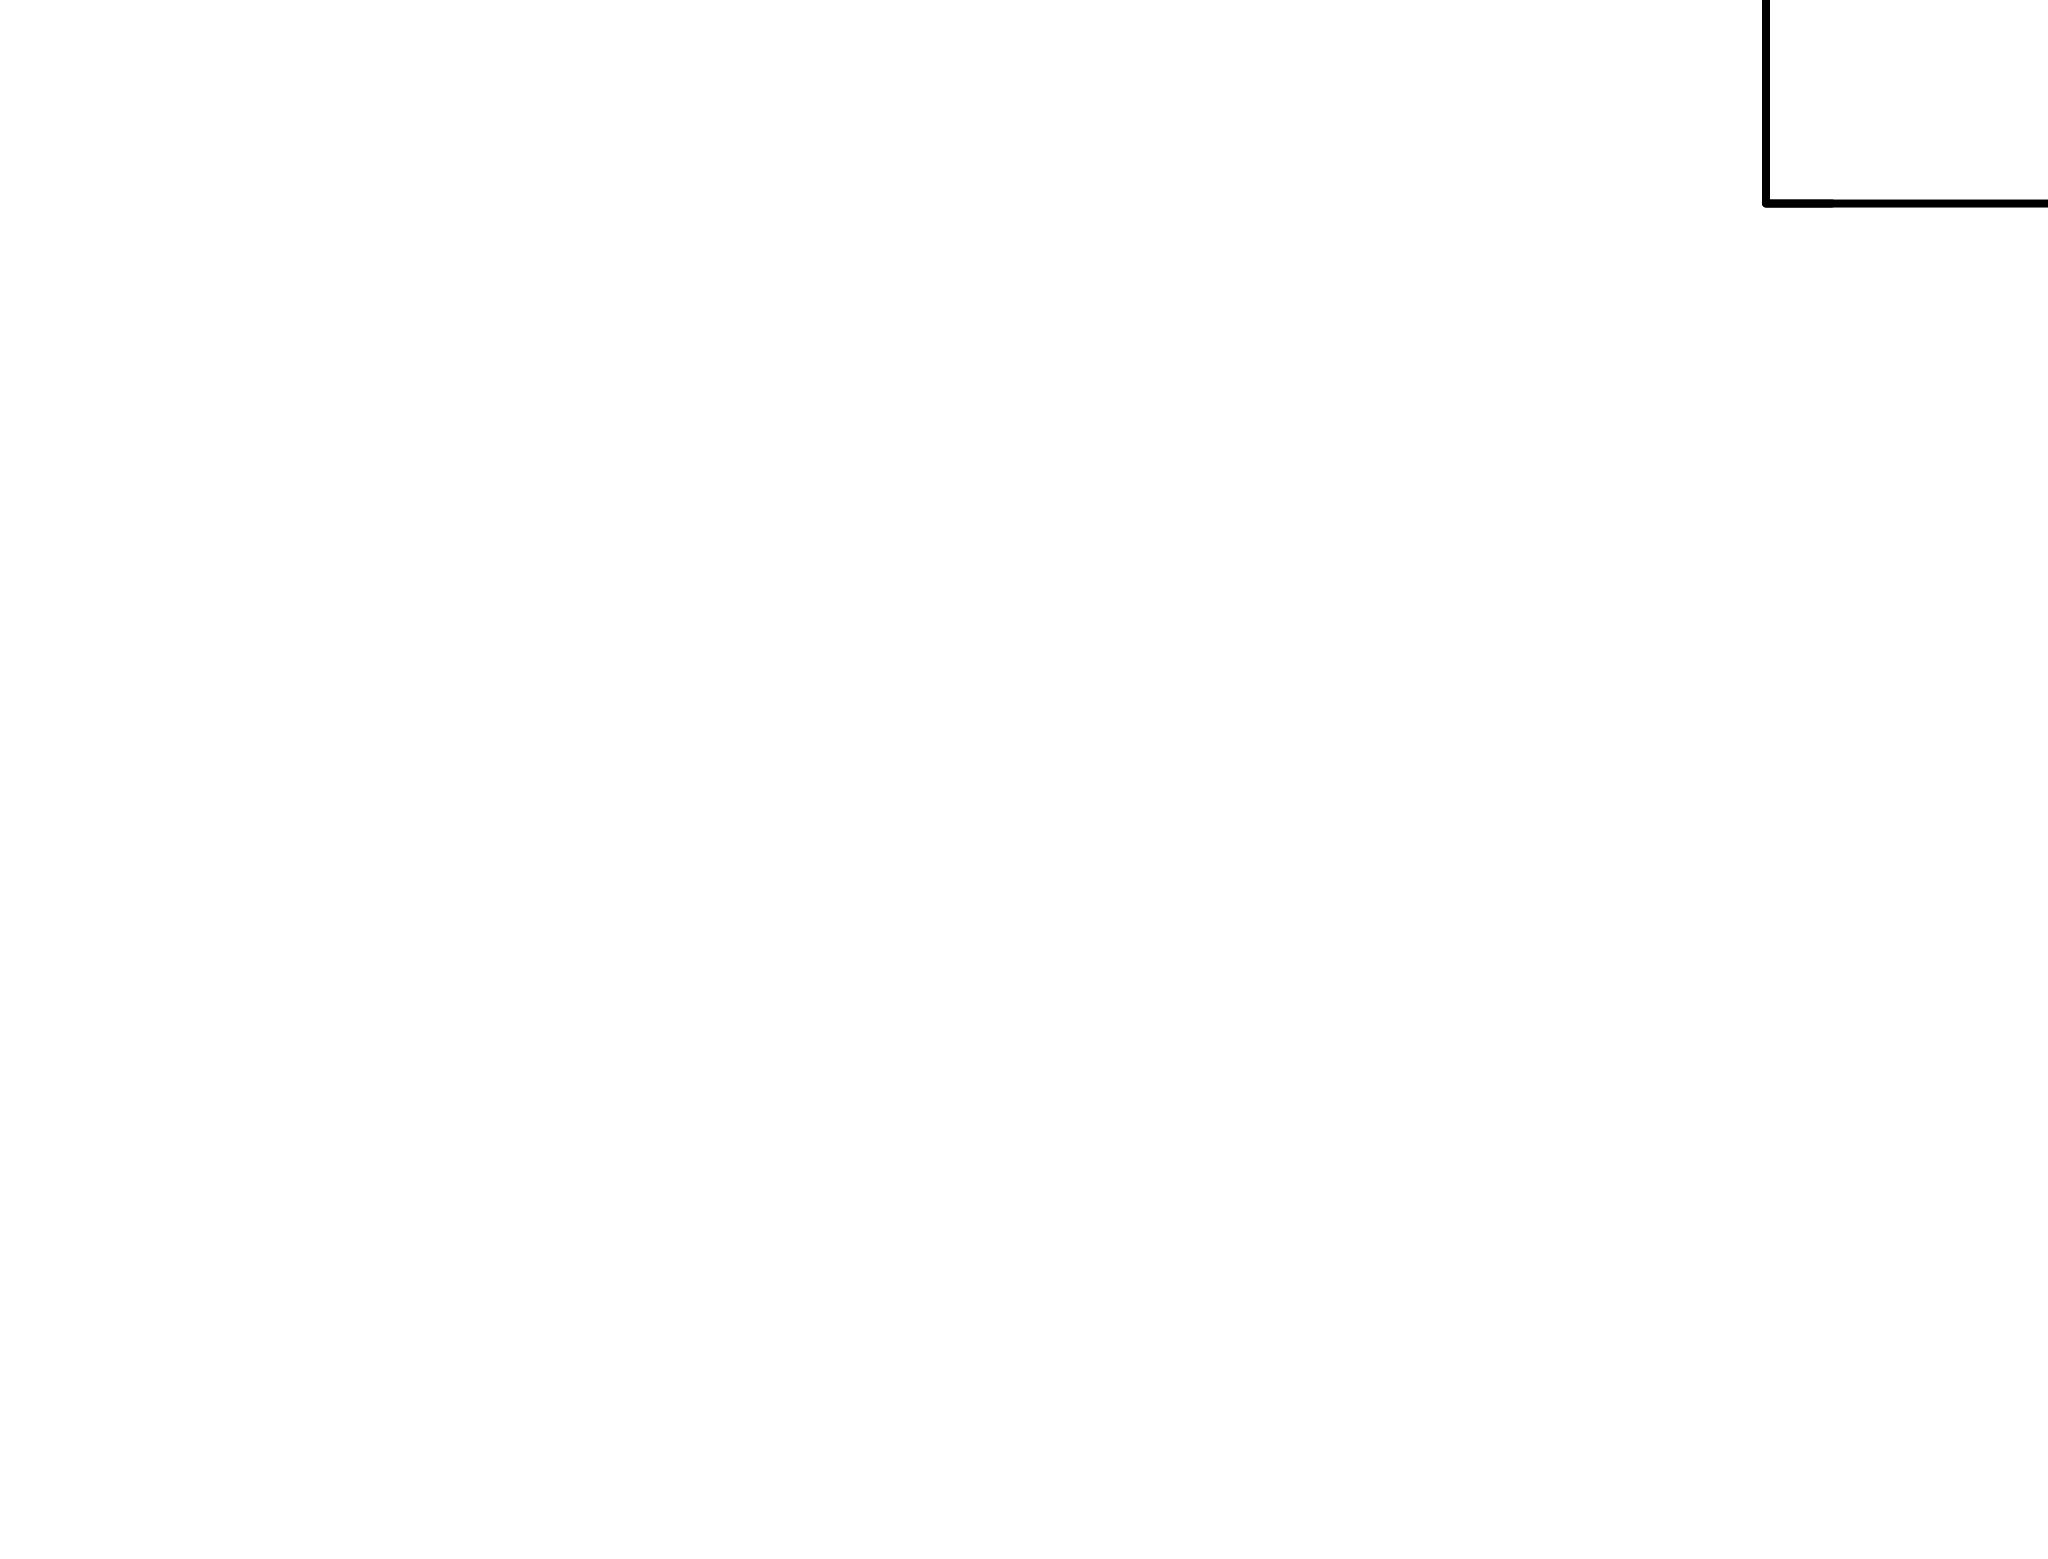

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0001 0.02")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.995812e+12     using 9 bins.

Tes

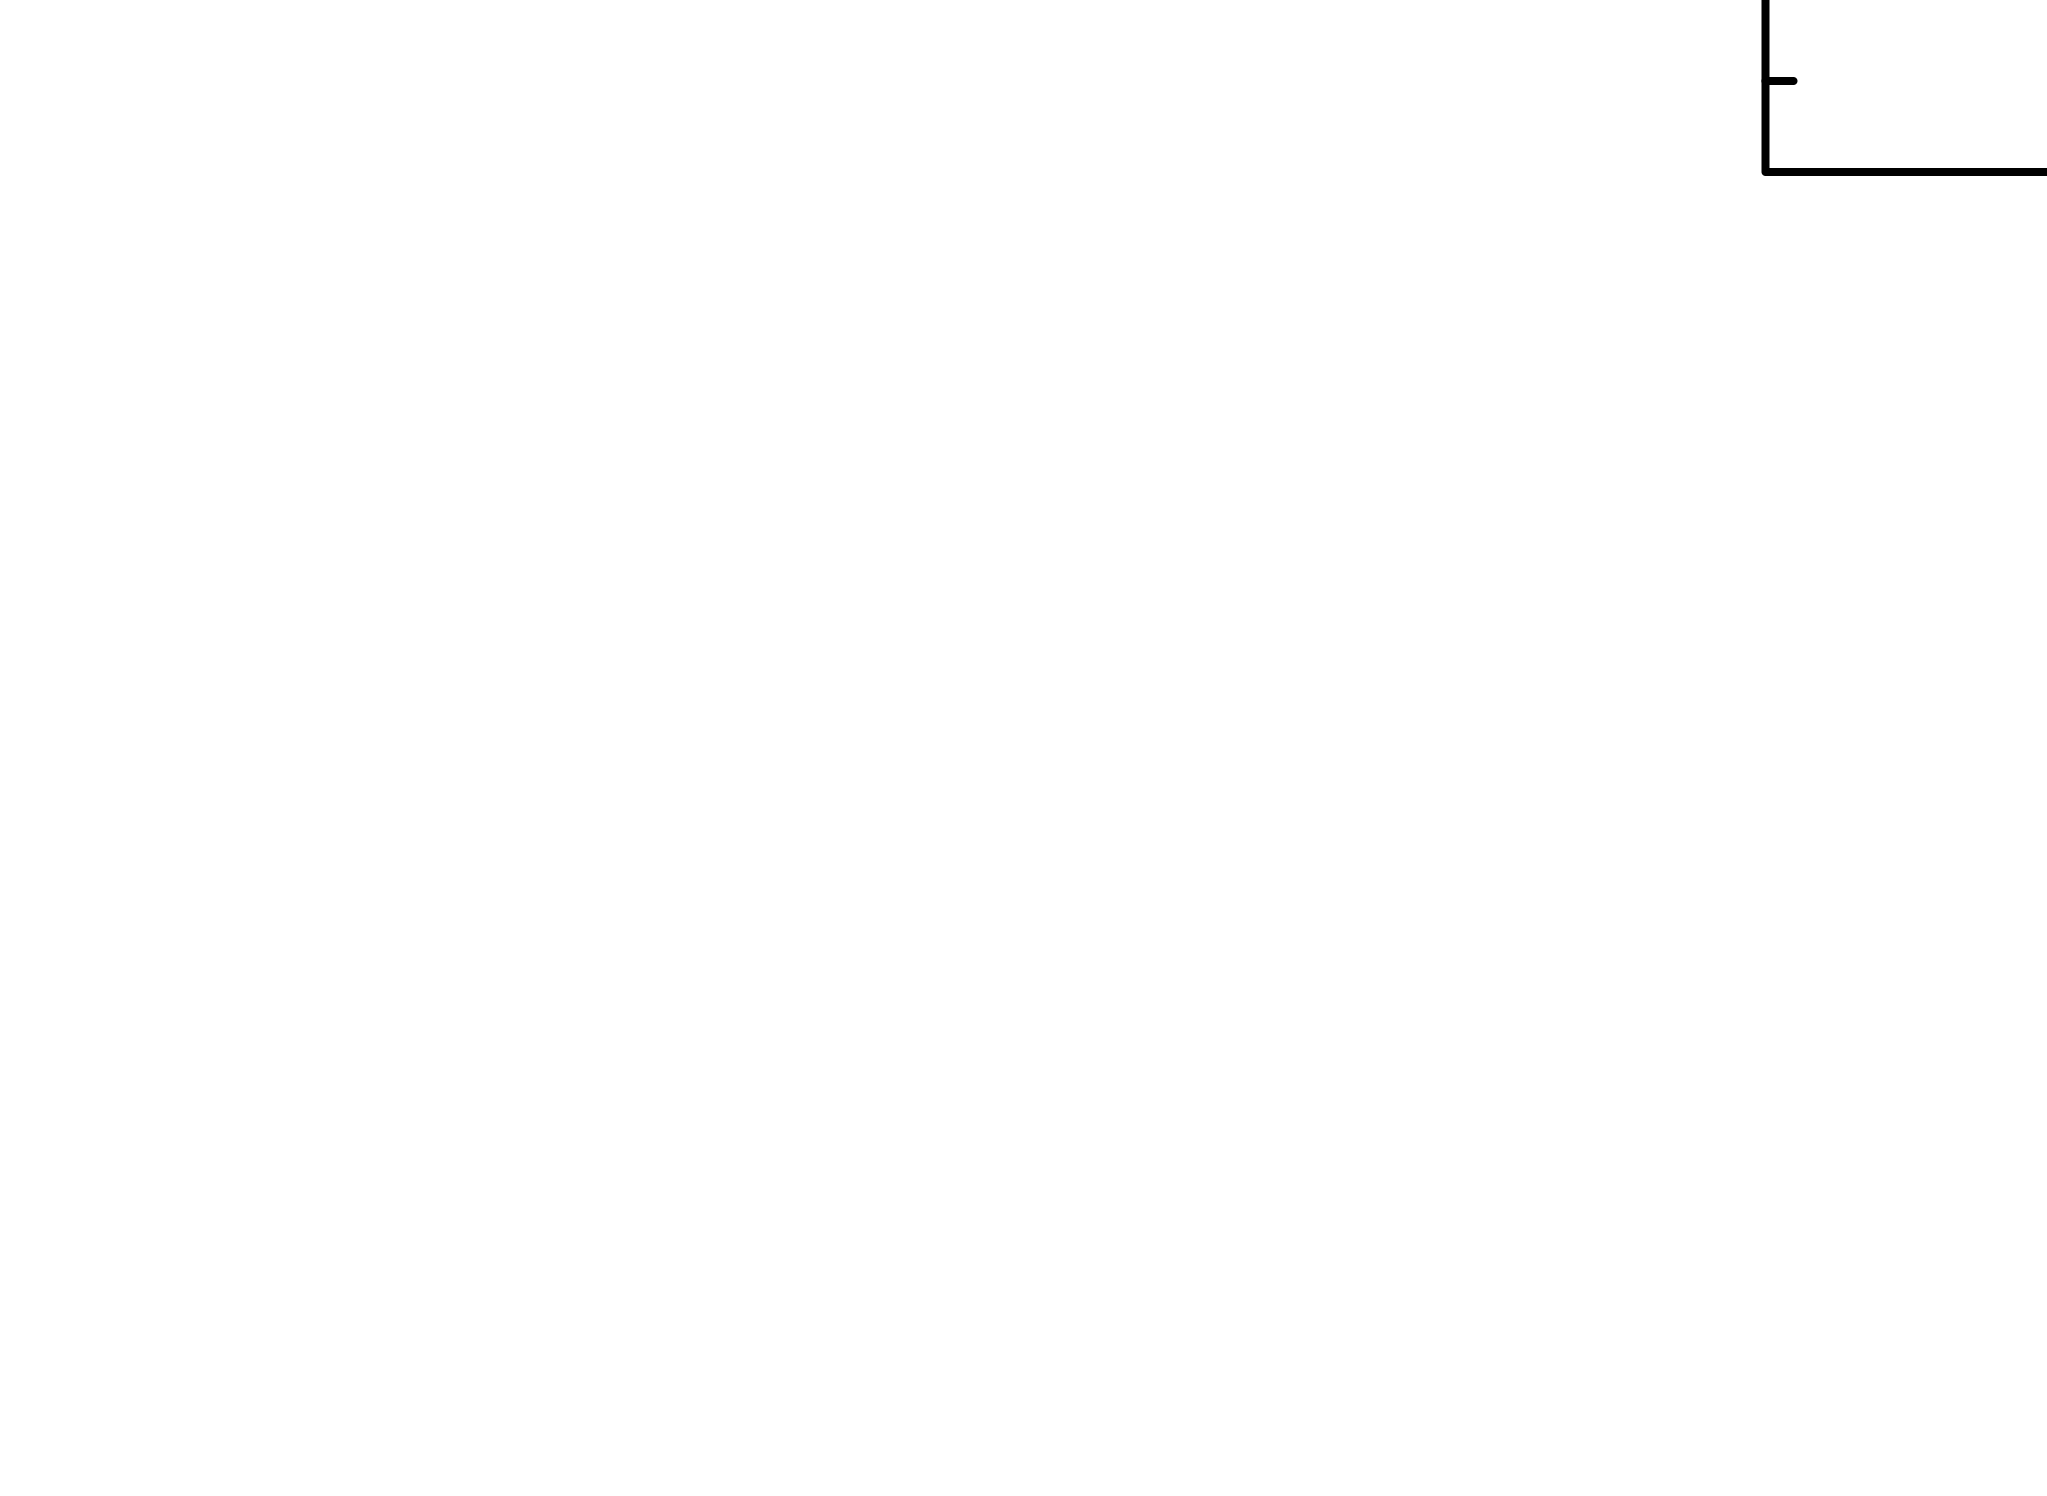

In [3]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.876289e+11     using 9 bins.

Test statistic : Chi-Squared              2.876289e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
11.5771      10.8021      -3      0.453020       1.75728   3.53405e-05
6.42162      75395.7      -4      0.573457       1.67005   4.09142e-05
6.13269      11479.6      -5      0.653585       1.78219   4.67508e-05
6

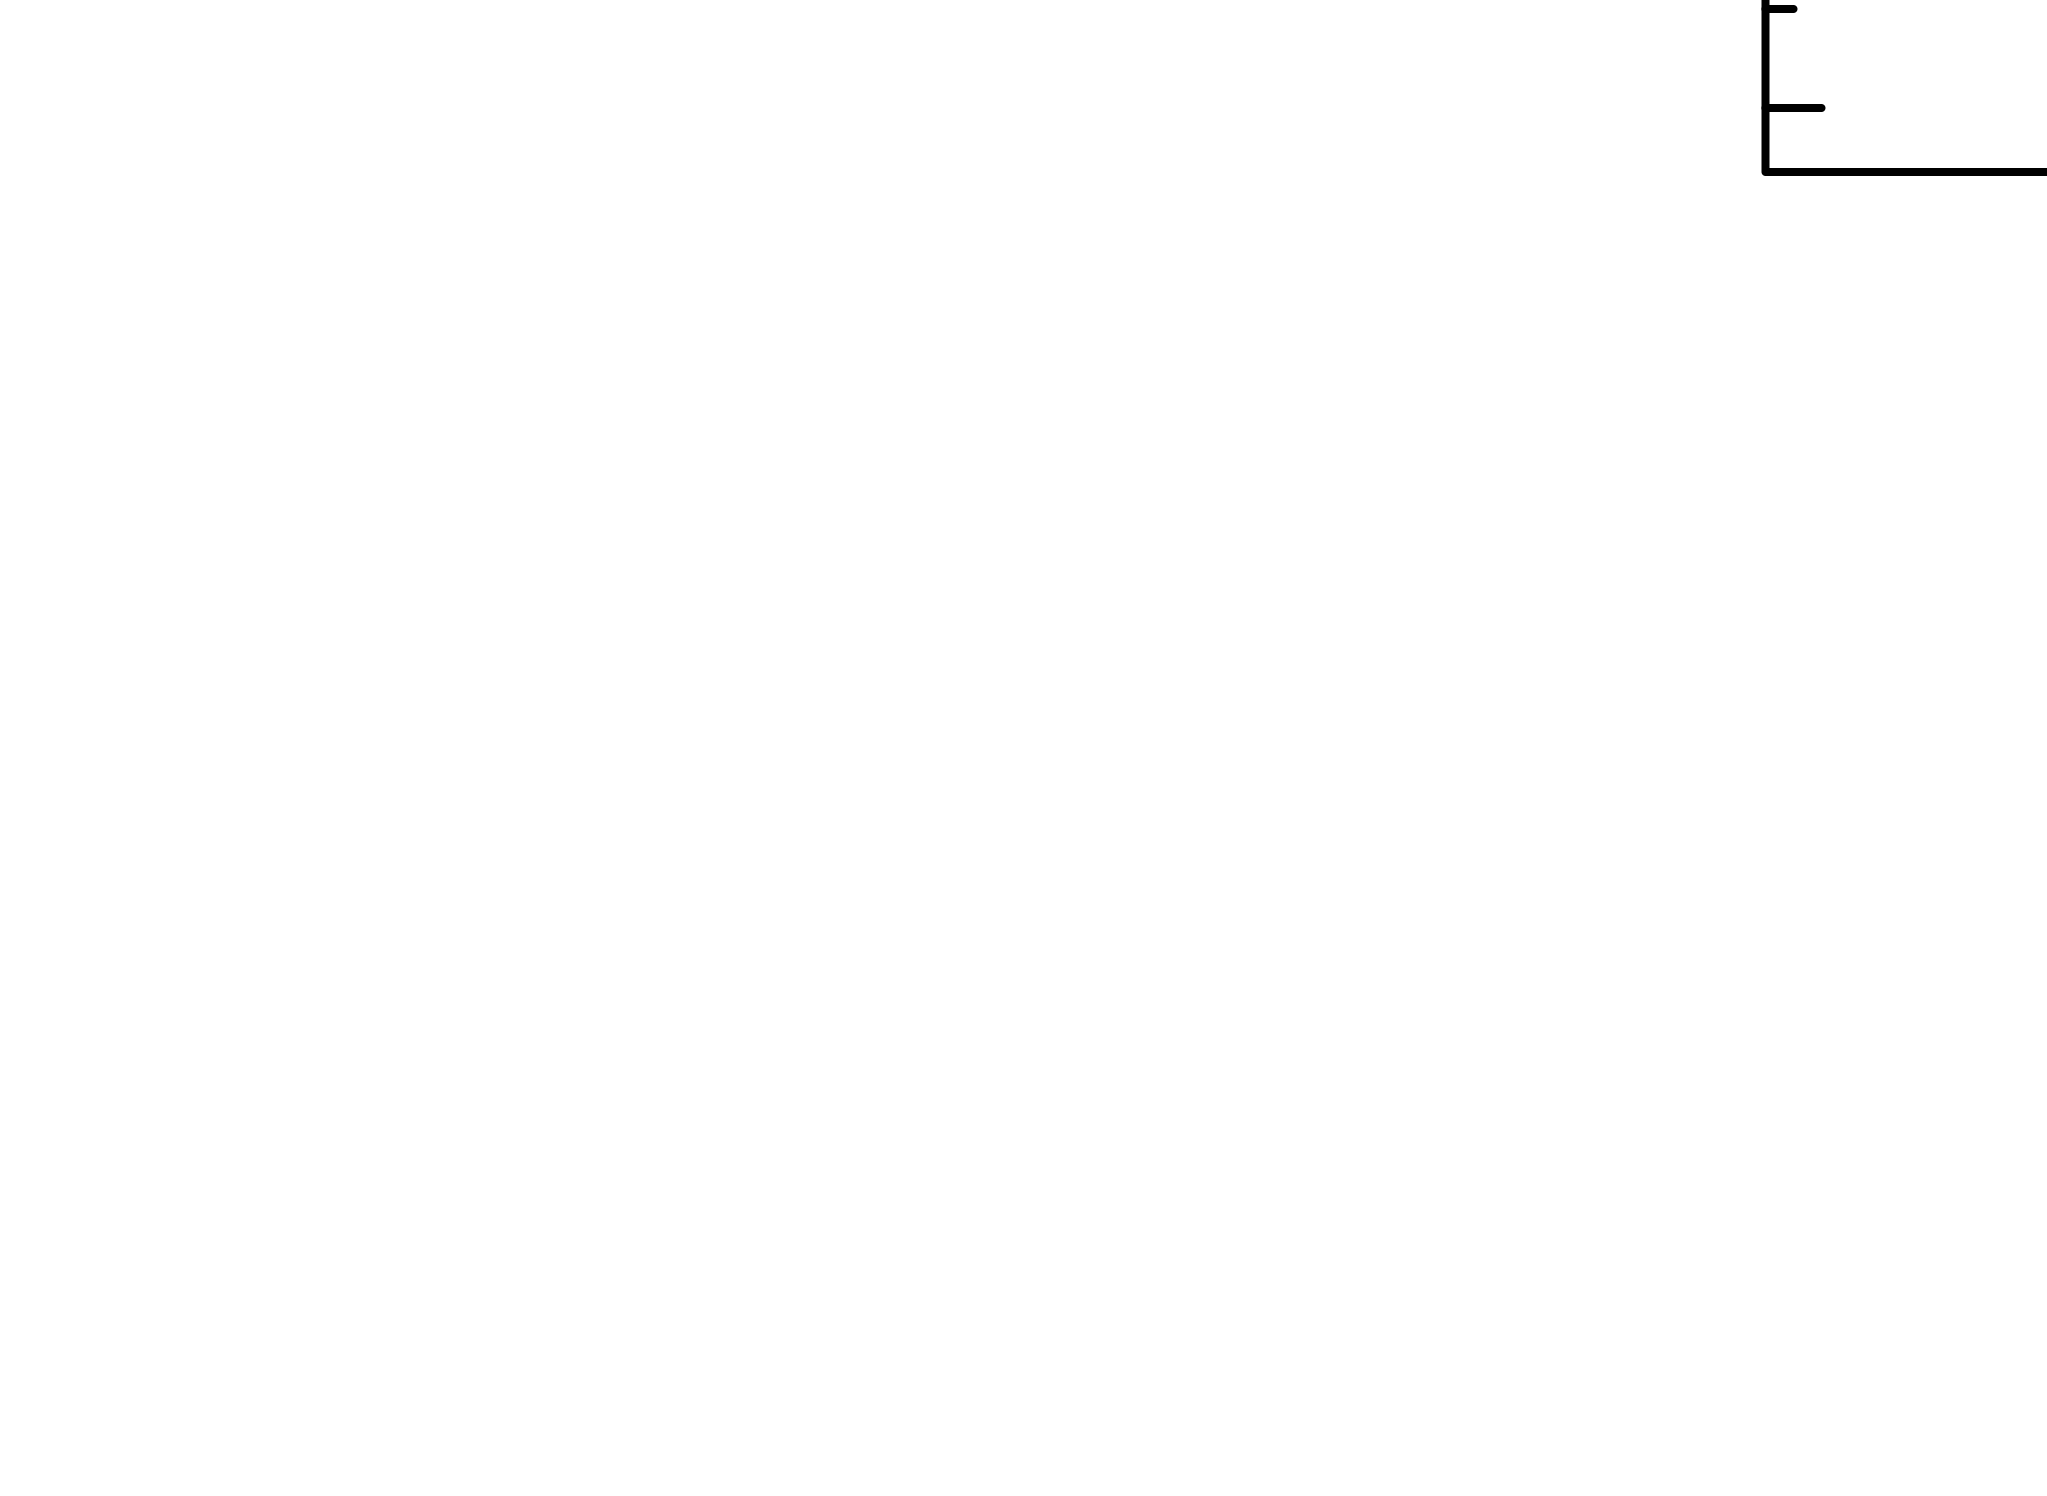

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              7.861757e+09     using 9 bins.

Test statistic : Chi-Squared              7.861757e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
54.0653      13.5093      -2       1.67070      0.851833   0.0

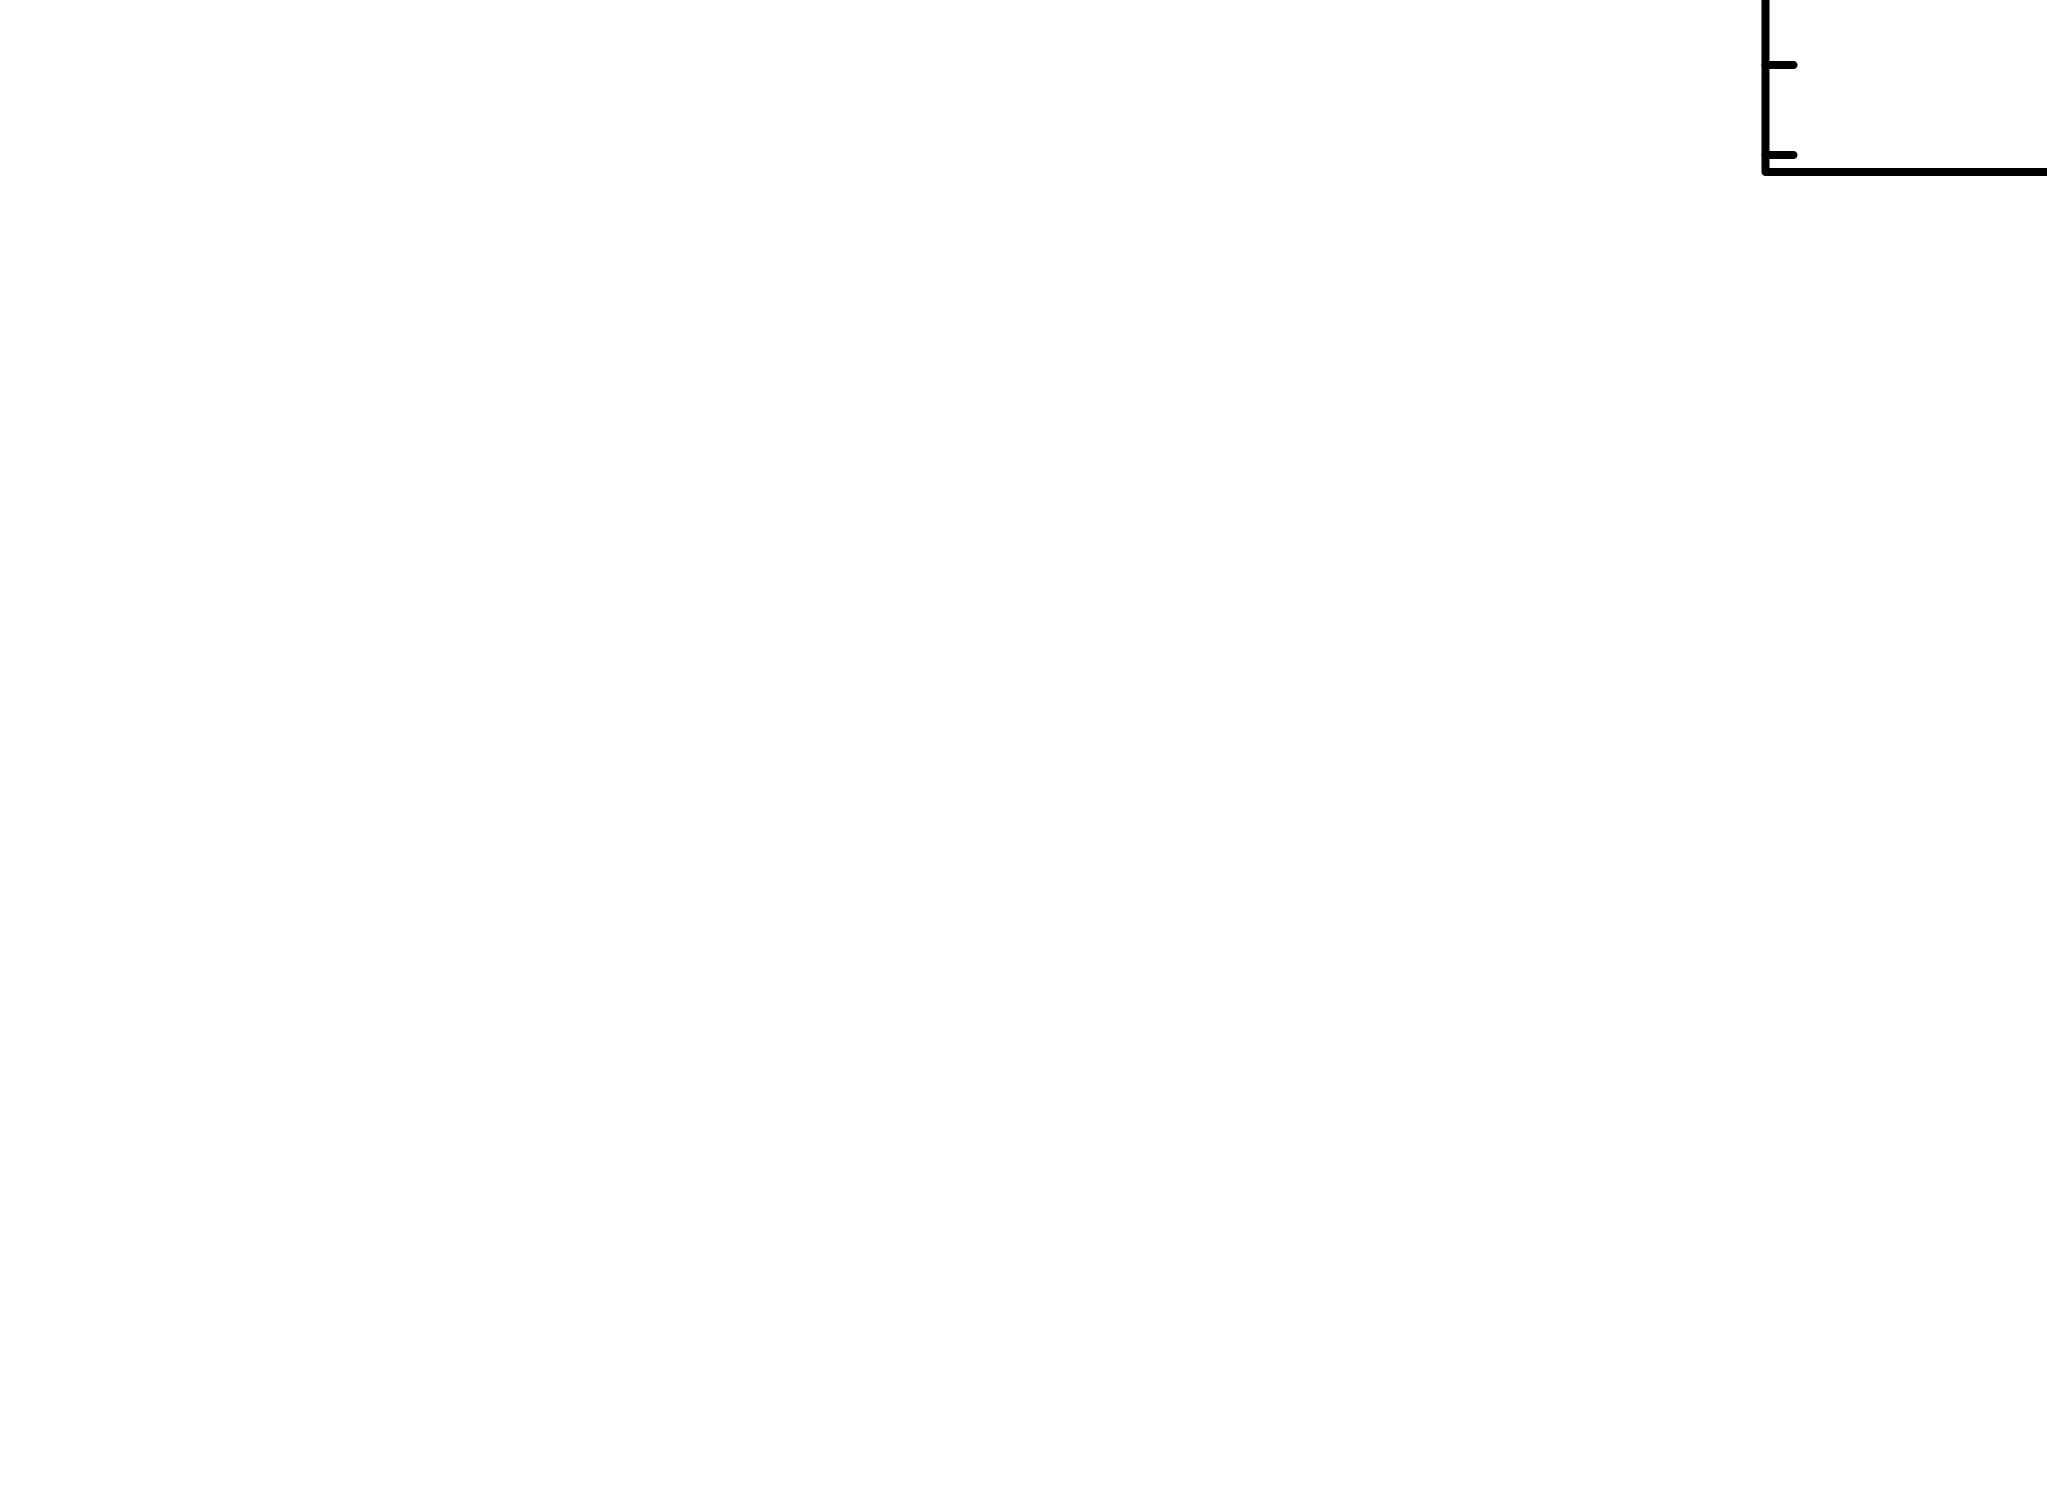

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.324124e+10     using 9 bins.

Test statistic : Chi-Squared              3.324124e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
5.17756      3.90206      -3      0.602987       6.18728   5.50825e-05
4.99691      19865.5      -4      0.588095       7.06314   5.17396e-05
4.99041      5869.61      -5      0.589602       7.08606   5.21114e-05
4.9

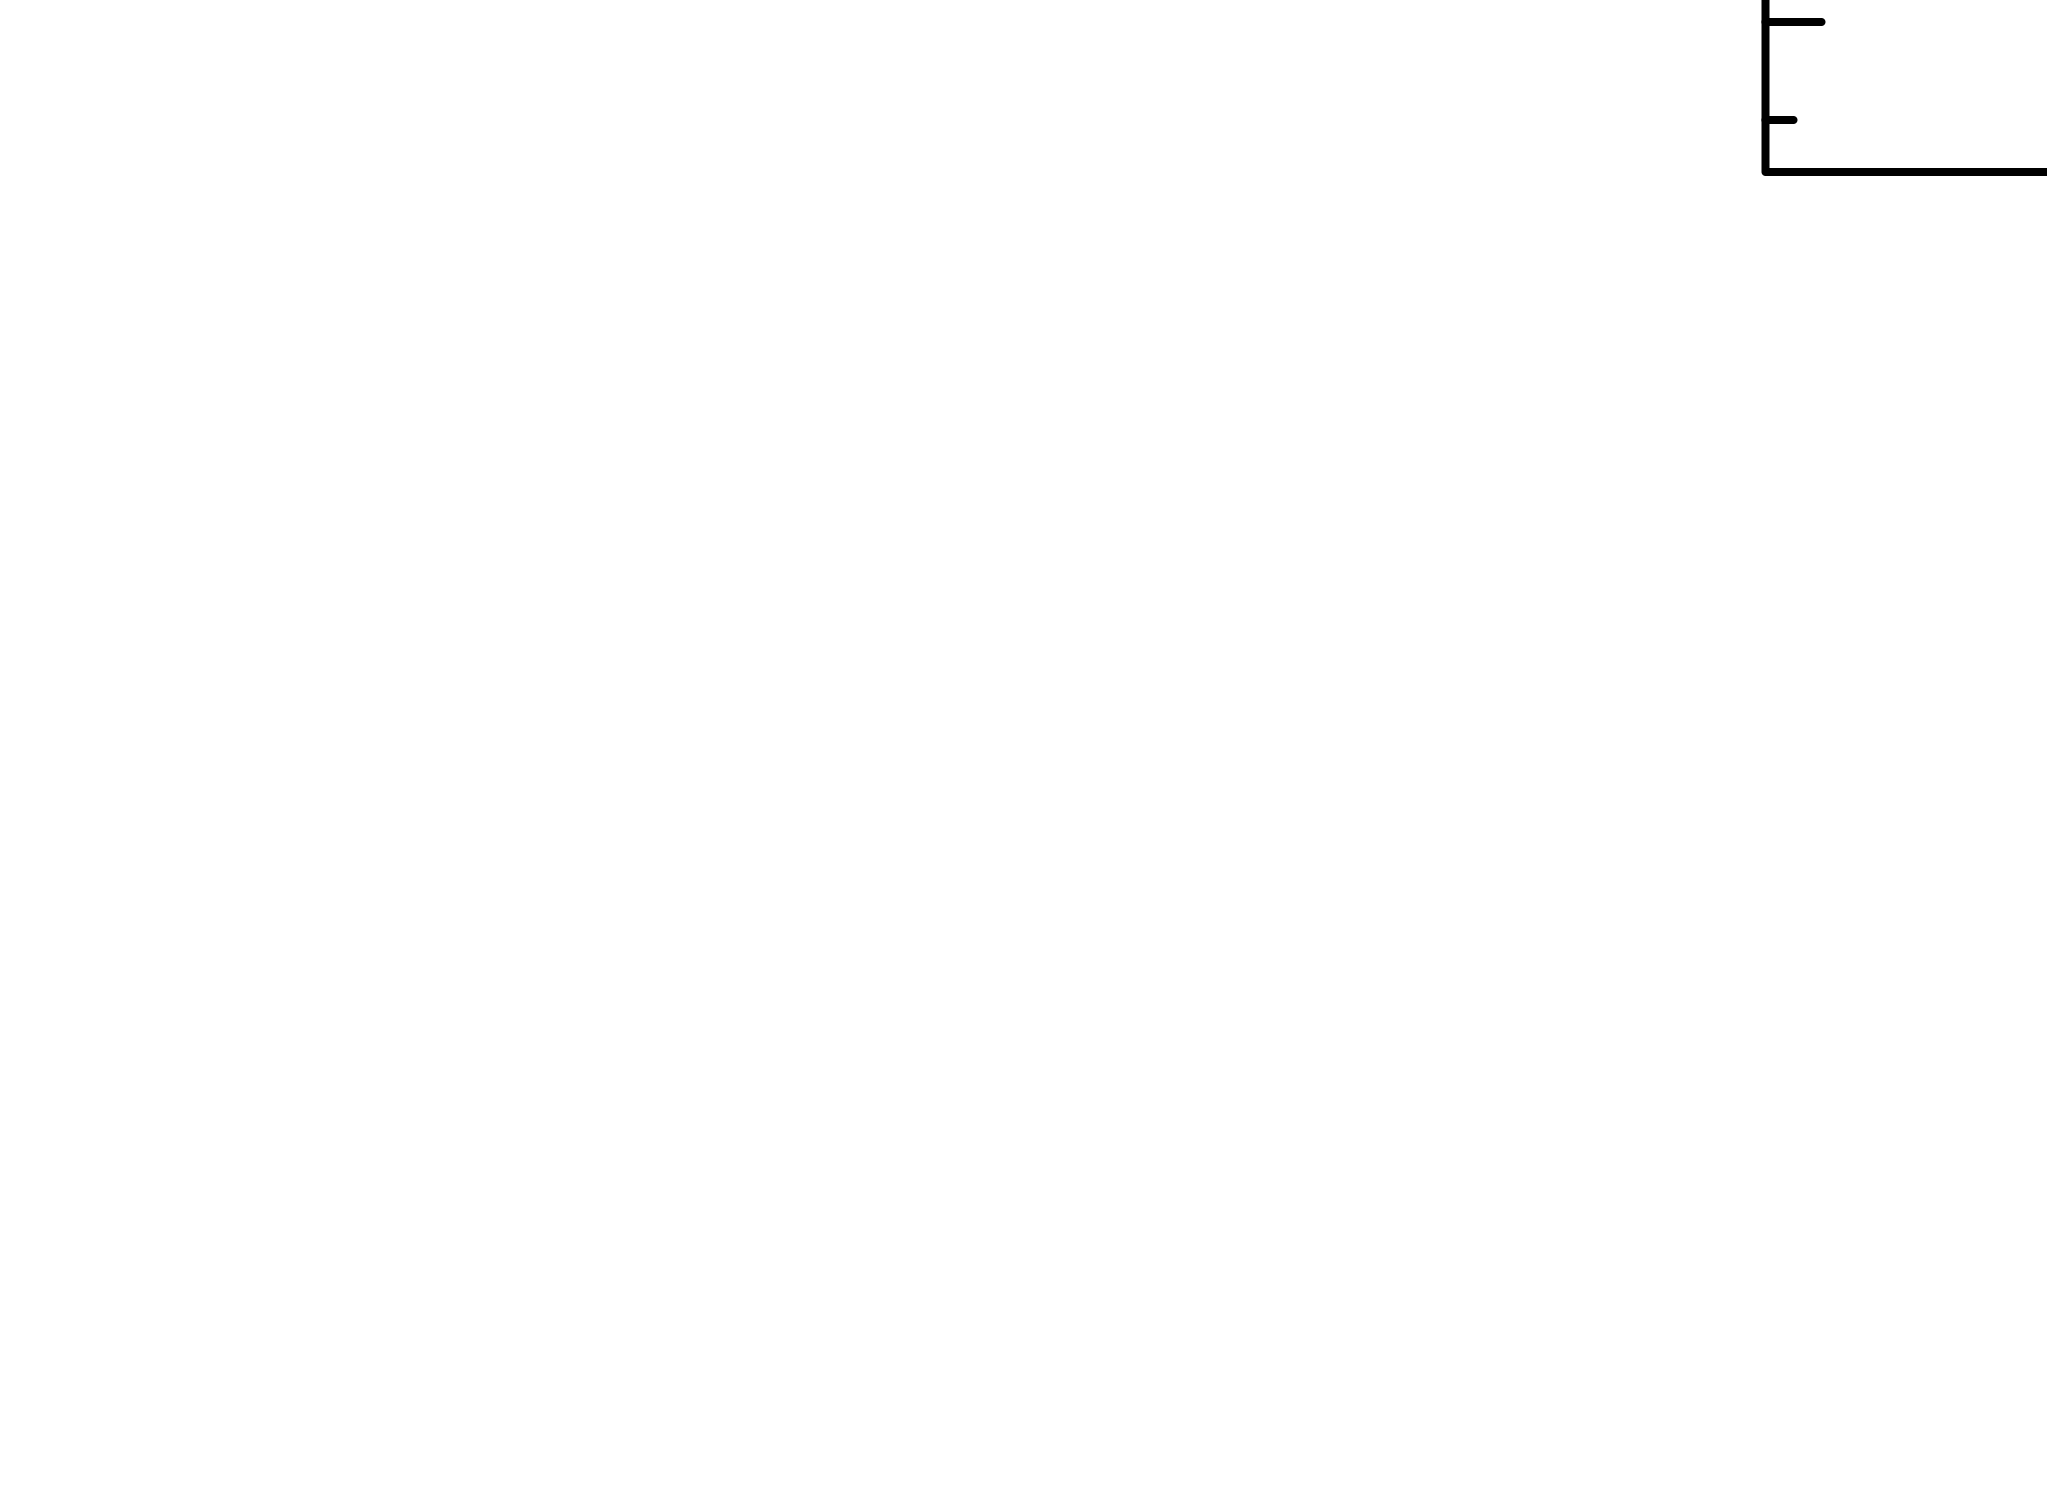

In [11]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [12]:
AllModels.calcFlux(".2 12.0")

 Model Flux 3.7367e-05 photons (1.9603e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
#plx = 1.4843
d_kpc = 8
F_x = 1.9603*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.5006658401646594e+33


In [15]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.176283996754236


In [16]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.5511332408449768



Model TBabs<1>(bremss<2> + bremss<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   bremss     kT         keV      7.00000      +/-  0.0          
   5    3   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.329734e+11     using 9 bins.

Test statistic : Chi-Squared              1.329734e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.893034e+10     using 9 bins.

Test statistic : Chi-Squared              4.893034e+10     using 9 bins.
 Null hypothesis proba

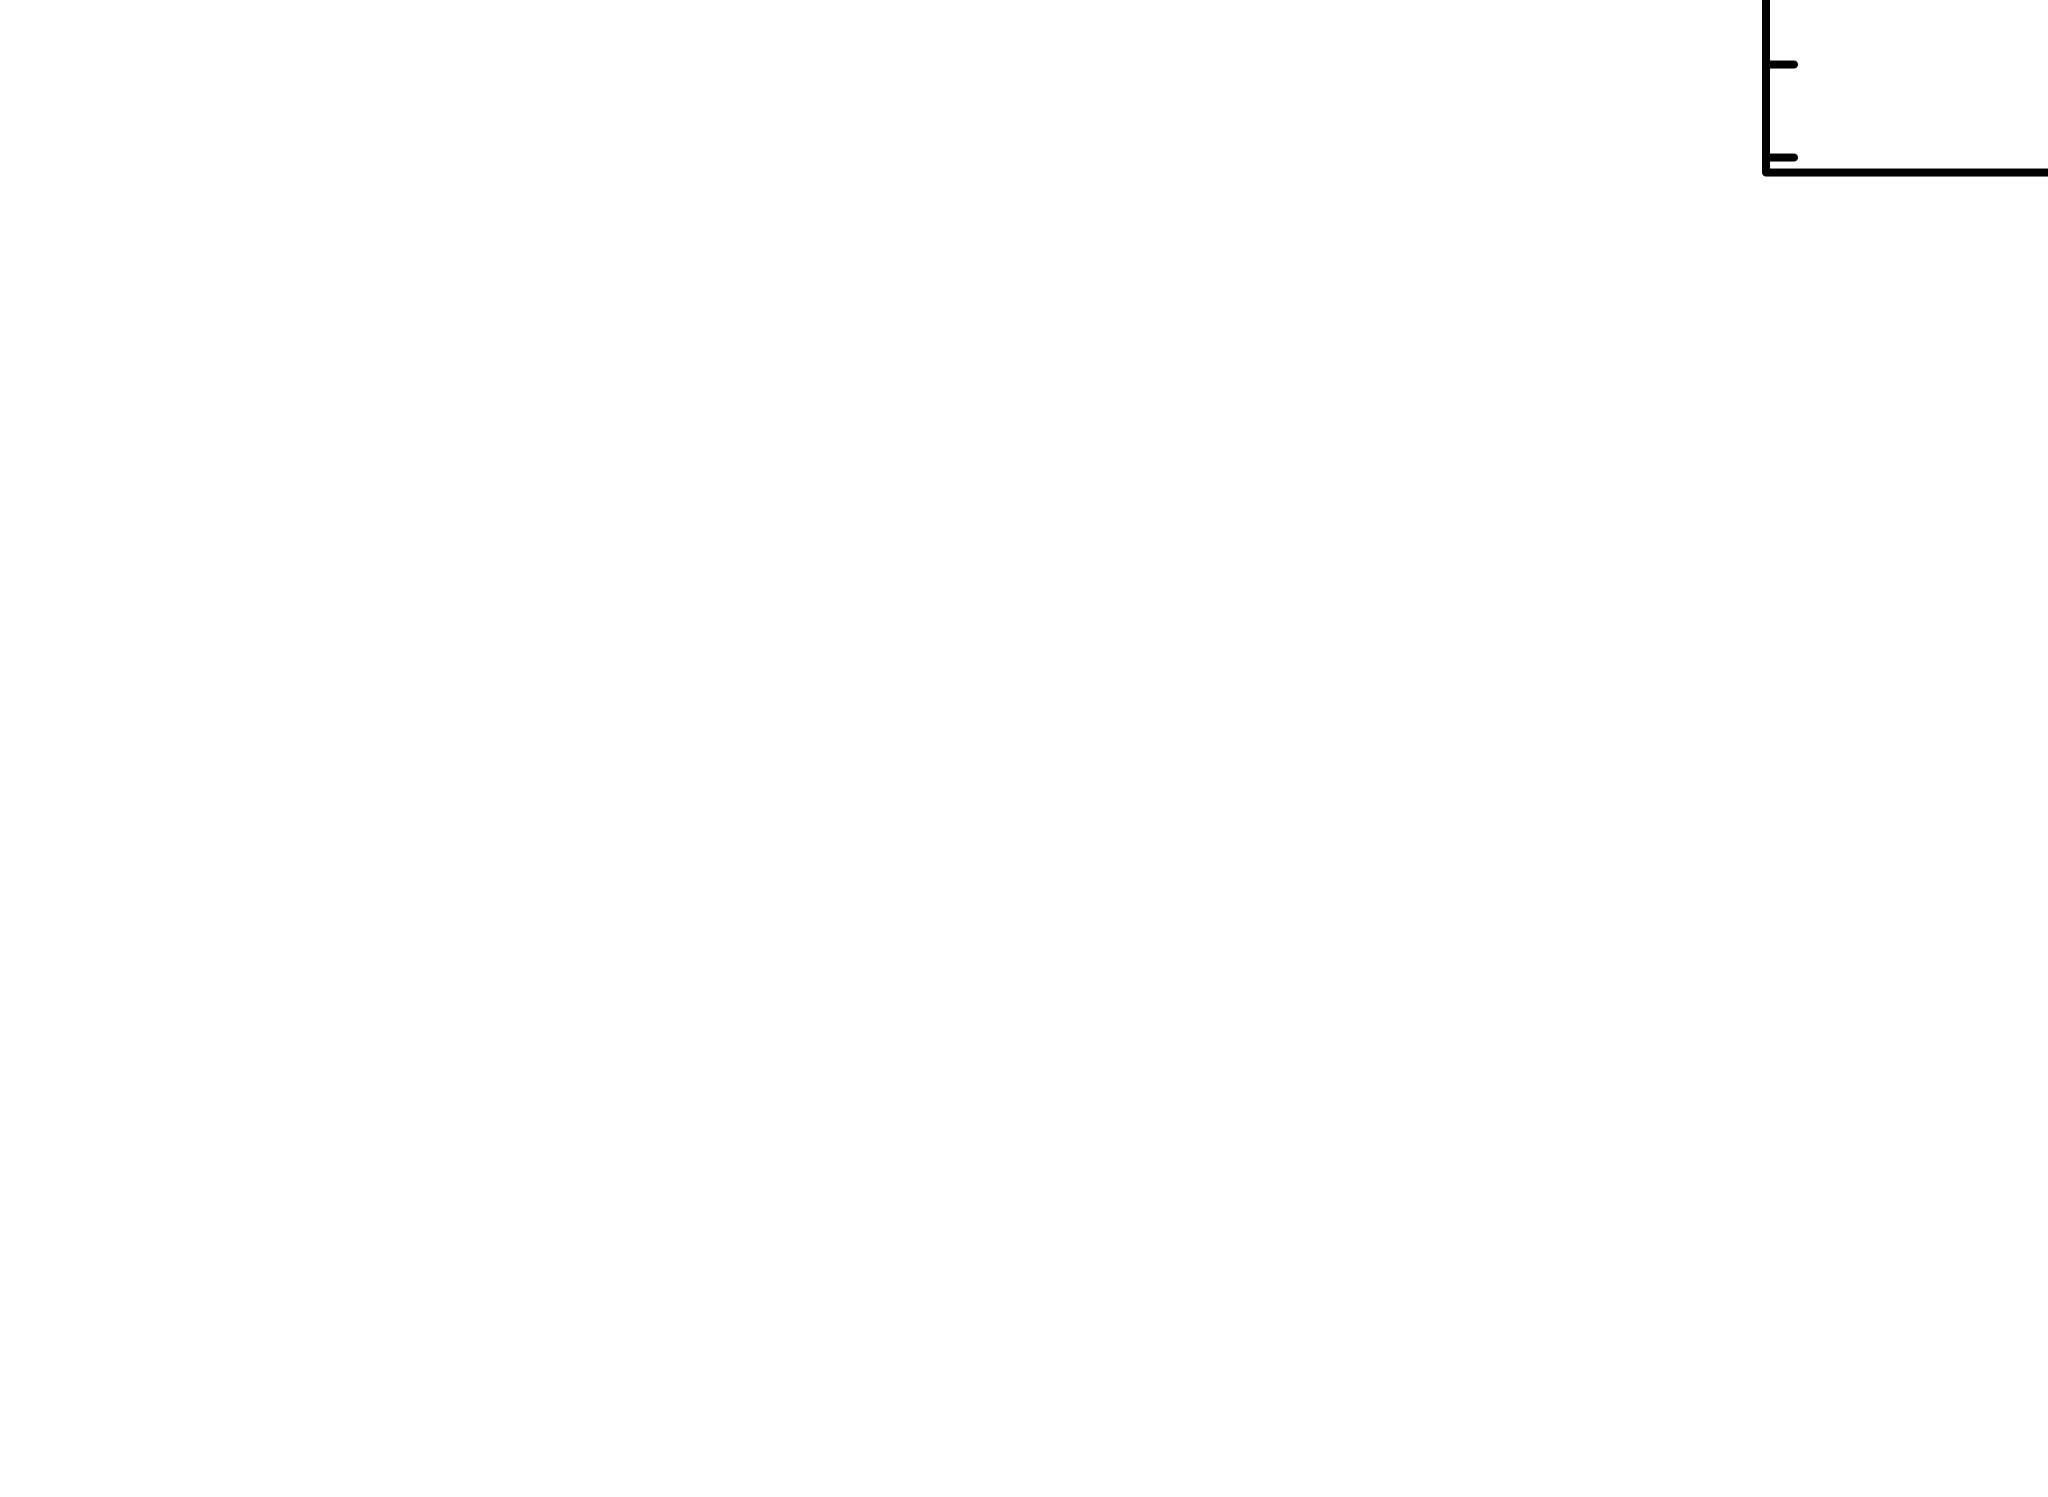

5.74163e-05
4.19601      1537.61      -1      0.803228      0.194535    0.00167216       6.02634   5.81941e-05
4.12545      1748.6       -1      0.824939      0.189669    0.00217591       5.90386   5.90202e-05
4.06561      1503.11      -1      0.845561      0.185811    0.00272965       5.79779   5.98089e-05
4.01408      1250.99      -1      0.865090      0.182641    0.00333038       5.70293   6.05543e-05
3.96891      1072.3       -1      0.883629      0.179963    0.00397665       5.61468   6.12705e-05
3.92876      942.064      -1      0.901318      0.177653    0.00466867       5.53182   6.19627e-05
3.89286      846.852      -1      0.918207      0.175633    0.00540612       5.45616   6.26259e-05
3.86058      758.623      -1      0.934330      0.173839    0.00618805       5.38677   6.32597e-05
3.83138      708.529      -1      0.949667      0.172227    0.00701207       5.32495   6.38654e-05
3.80443      624.278      -1      0.964552      0.170741    0.00788363       5.25739   6.44893e-0

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+bremss)")
mo.bremss.kT = 1.0
Fit.perform()
Plot("data resid")